<a href="https://colab.research.google.com/github/kixtter/AnalisisInteligenteDatos/blob/main/Unidad%201/Caso_4_Regresion_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 4. Regresión Lineal Simple

## Objetivo
Realizar una teria de predicción de casos confirmados mediante el algoritmo de machine learning de regresión lineal simple.

## Descripción

*  Cargar datos de cantidad de habitantes de una población y sus casos confirmados de COVID. Los datos son casos confirmados de 02-02-2020 al 18-09-2021 en formato DD-MM-AAAA(dia-mes-año).
*  Archivo csv localizado en: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados.csv
*  Fuente obtenida de datos del gobiendo de México: https://datos.covid-19.conacyt.mx/#DownZCSV
*  Explorar los datos.
*  Definir la variable independiente y la variable dependiente.
*  Aplicar el modelo de regresión lineal simple.
*  Evaluar el modelo, con error cuadrado medio y su significado.
*  Hacer estimaciones para una cierta cantidad de población para determinar cuantos casos confirmados sería. Son predicciones.


## Fundamento Teórico

**Regresión Lineal Simple.**

El objetivo de un modelo de regresión es tratar de explicar la relación que existe entre una variable dependiente(variable respuesta) Y un conjunto de variables independientes (variables explicativas) X1,..., Xn.

En un modelo de regresión lineal simple tratamos de explicar la relación que existe entre la variable respuesta Y y una única variable explicativa X. 

Mediante las técnicas de regresión de una variable Y sobre una variable X, buscamos una función que sea una buena aproximación de una nube de puntos(xi, yi).

El modelo de regresión lineal simple tiene la siguiente expresión:

$ Y = \alpha + \beta X + \epsilon $

En donde $\alpha$ es la ordenada en el origen (el valor que toma Y cuando X vale 0), $\beta$ es la pendiente de la recta (e indica cómo cambia Y al incrementar X en una unidad) y $\epsilon$ una variable que incluye un conjunto grande de factores, cada uno de los cuales influye en la respuesta sólo en pequeña magnitud, a la que llamaremos error. X e Y son variables aleatorias, por lo que no se puede establecer una relación lineal exacta entre ellas.


## Desarrollo

### Librerias

In [51]:
# Datos
import numpy as np
import pandas as pd
import seaborn as sb

# Gráficos
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Regresiones lineales
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

##Cargar los datos

In [52]:
datos = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados.csv')

datos.shape

(32, 4)

In [53]:
# Estadísticas elementales
datos[['poblacion', 'confirmados']].describe()

,poblacion,confirmados
count,3.200000e+01,32.000000
mean,3.993509e+06,111552.406250
std,3.339196e+06,162782.981721
min,7.851530e+05,21443.000000
25%,1.832562e+06,46325.000000
50%,3.121544e+06,69892.500000
75%,5.021589e+06,107953.250000
max,1.742779e+07,931135.000000


In [54]:
datos

,cve_ent,nombre,poblacion,confirmados
0,1,AGUASCALIENTES,1434635,32795
1,2,BAJA CALIFORNIA,3634868,59049
2,3,BAJA CALIFORNIA SUR,804708,54730
3,4,CAMPECHE,1000617,21961
4,7,CHIAPAS,5730367,21443
5,8,CHIHUAHUA,3801487,64386
6,9,DISTRITO FEDERAL,9018645,931135
7,5,COAHUILA,3218720,86766
8,6,COLIMA,785153,30069
9,10,DURANGO,1868996,46394


## Visualización de datos

#### Histograma
Se visualizan los histogramas únicamente de las variables numericas dependiente e independiente

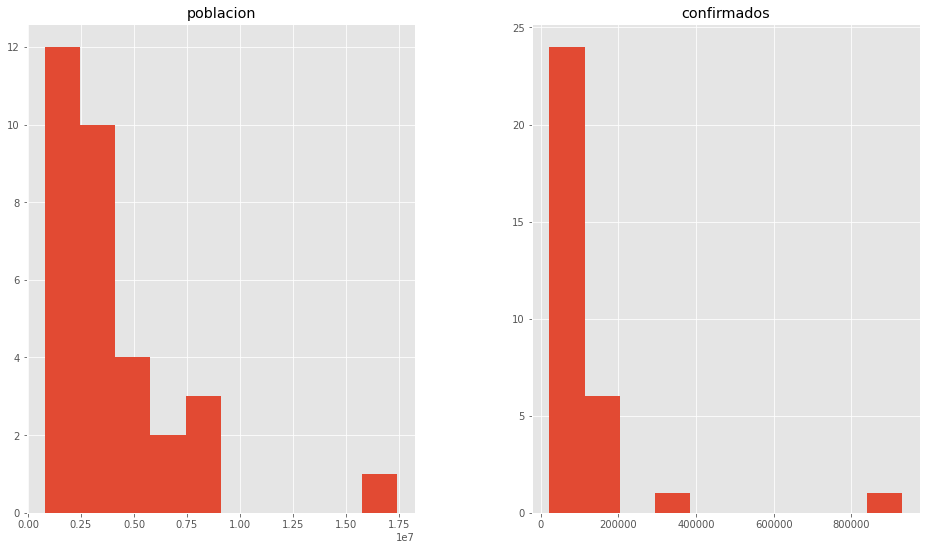

In [55]:
datos[['poblacion', 'confirmados']].hist()
plt.show()

Las variables al no contar con un comportamiento gaussiano o parten de una distribución normal, se planea la situación de si valdrá la pena aplicar la regresión lineal simple.

####Diagrama de dispersión

<function matplotlib.pyplot.show>

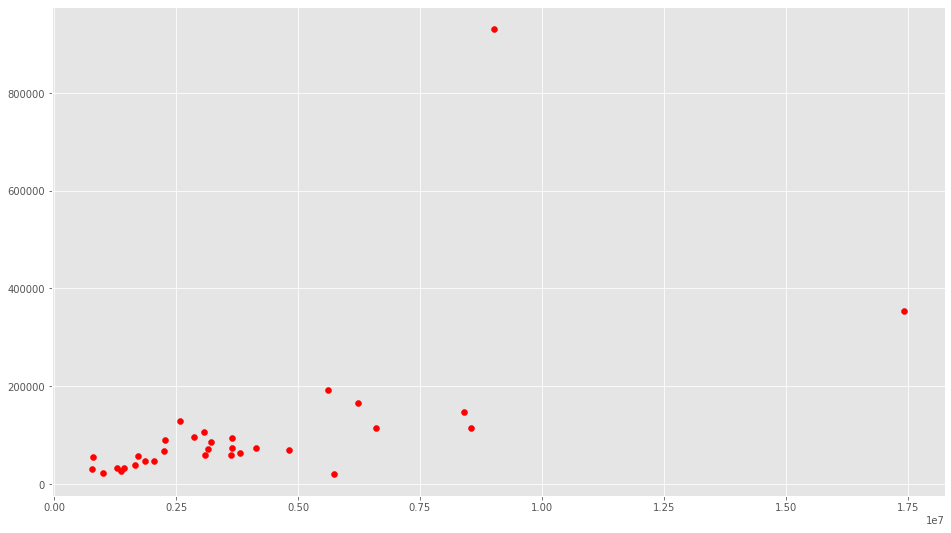

In [56]:
plt.scatter(datos['poblacion'], datos['confirmados'], c='red')
plt.show

## Aplicar modelos de regresión

Se utiliza la función linear_model.LinearRegression() para construir la regresión lineal.

Se almacena la regresión en una variable llamada regr.

Se construye un modelo de entrenamiento con todos los datos

In [57]:
regr = linear_model.LinearRegression()
poblacion = np.array(datos['poblacion'])

poblacion

array([ 1434635,  3634868,   804708,  1000617,  5730367,  3801487,
        9018645,  3218720,   785153,  1868996,  6228175,  3657048,
        3086414,  8409693, 17427790,  4825401,  2044058,  1288571,
        5610153,  4143593,  6604451,  2279637,  1723259,  2866142,
        3156674,  3074745,  2572287,  3650602,  1380011,  8539862,
        2259098,  1666426])

In [58]:
confirmados = np.array(datos['confirmados'])
confirmados

array([ 32795,  59049,  54730,  21961,  21443,  64386, 931135,  86766,
        30069,  46394, 166331,  73397,  58760, 148185, 353717,  69115,
        46118,  31851, 192059,  73852, 115456,  90915,  57020,  96746,
        70670, 105906, 128415,  93751,  27541, 114095,  67103,  39946])

In [59]:
regr.fit(poblacion.reshape(-1, 1), confirmados)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Objeto de predicción
Se construye objeto de predicción para construir la recta lineal

In [60]:
y_pred = regr.predict(poblacion.reshape(-1, 1))
y_pred

array([ 39204.94607726, 101412.49253176,  21394.91726874,  26933.88437739,
       160658.87752275, 106123.33869338, 253628.89771621,  89646.67225639,
        20842.03556443,  51485.70547207, 174733.4842964 , 102039.59128919,
        85905.96314003, 236411.8985036 , 491382.02578499, 135072.62620993,
        56435.26194969,  35075.25478305, 157260.04749453, 115795.75742692,
       185371.99701288,  63095.82543829,  47365.25950219,  79678.17695892,
        87892.43557904,  85576.04359988,  71369.96661784, 101857.34247989,
        37660.5528164 , 240092.18787042,  62515.12294149,  45758.41082405])

##Evaluar el modelo
Se muestran los valores de los coeficientes de la ecuación

$Y = \beta 0 + \beta\cdot{x_i}$

In [61]:
print("Coeficiente: ", regr.coef_)

# Este es el valor donde corta el eje Y (en X = 0)
print('Termino independiente: %.2f' % regr.intercept_)

# Error Cuadrado Medio
print('Error Cuadrado Medio: %.2f' % mean_squared_error(confirmados, y_pred))

# Puntaje de Varianza. El mejor  puntaje es un 1.0
print('Puntaje de Varianza: %.2f' % r2_score(confirmados, y_pred))

Coeficiente:  [0.02827316]
Termino independiente: -1356.72
Error Cuadrado Medio: 17035583585.45
Puntaje de Varianza: 0.34


$\beta 1$ = -1356.72

Y = -1356.72 + 0.02827316 $\cdot{x_i}$

¿Cuántos casos confirmados serían para una población de 500000?

12,779.86 = -1356.72 + 0.02827316 * 500000

## Visualizar recta

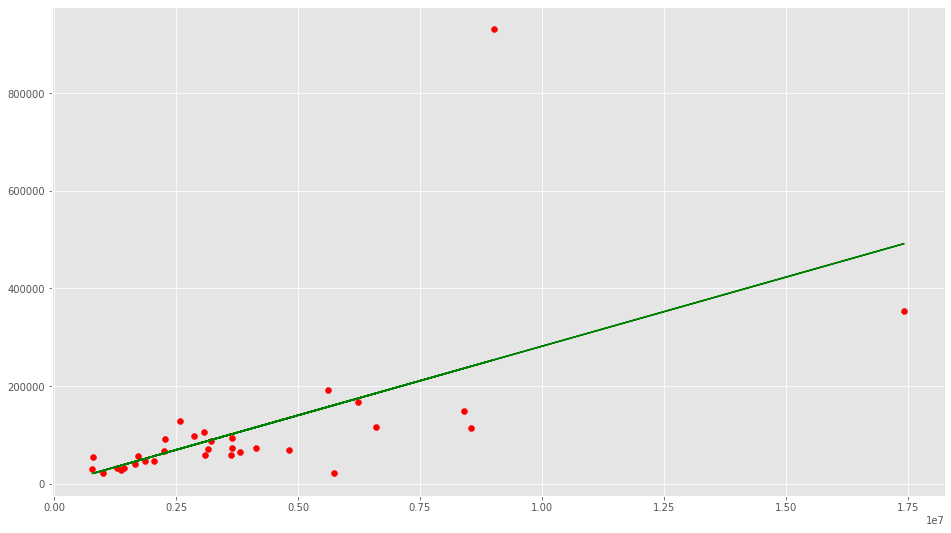

In [62]:
plt.scatter(datos['poblacion'], datos['confirmados'], c='red')
plt.plot(poblacion, y_pred, c='green')
plt.show()

##Predecir valores

¿Cuál es la predicción de casos confirmados para una población de 500,000?

¿Cuál es la predicción de casos confirmados para una población de 1,000,000?

¿Cuál es la predicción de casos confirmados para una población de 2,000,000?

In [63]:
prediccion = regr.predict([[500000]])
print(int(prediccion))

12779


In [64]:
prediccion = regr.predict([[1000000]])
print(int(prediccion))

26916


In [65]:
prediccion = regr.predict([[2500000]])
print(int(prediccion))

69326


In [66]:
prediccion = regr.predict([[5000000]])
print(int(prediccion))

140009


In [67]:
prediccion = regr.predict([[7500000]])
print(int(prediccion))

210691


#Interpretación

En este caso 4. Regresión lineal simple aplicada a los datos sobre los casos confimados de COVID por estado, en la República Mexicana, existe un promedio de contagidos de 111,552 casos en todo el país lo cual puede representar una pequeña cantidad teniendo en cuenta que México cuenta con 127.6 millones de habitantes, la cantidad real de contagiados ronda el millón lo pues representa el 0.72% de la población.

Haciendo uso de la regresión lineal se explica la relación que existe entre la población por estado y la cantidad de casos confirmados, por lo cual se puede observar que tiene la cantidad de casos confimados va de la mano con la cantidad de habitantes por estado, entre más personas existan en una misma ubicación es mayor la posibilidad de contraer el virus.

Haciendo uso de predicciones se puede estimar la cantidad de contagiados que pueden haber según la cantidad de habitantes existentes en 'X' ubicación, por ejemplo:
*  Para 500,000 habitantes se estima que existan 12,779 casos confirmados.
*  Para 1,000,000 habitantes se estima que existan 26916 casos confirmados.
*  Para 2,500,000 habitantes se estima que existan 69326 casos confirmados.
*  Para 5,000,000 habitantes se estima que existan 140009 casos confirmados.
*  Para 7,500,000 habitantes se estima que existan 210691 casos confirmados.

Aun viendo estas estimaciones la cantidad de posibles casos de contagios sigue siendo poca pero eso solo seria temporal sí las personas no tuvieran en cuenta su salud y la de sus seres queridos.